In [1]:
# %load test.py
"""
Created on Thu Aug  1 14:08:58 2024

@author: joseph@艾鍗學院 www.ittraining.com.tw
"""

import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'
os.environ['OMP_NUM_THREADS']='1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import cv2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Data Mining/04_Clustering/K-means_sklearn/image_clustering

/content/drive/MyDrive/Data Mining/04_Clustering/K-means_sklearn/image_clustering


In [4]:


# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
    img_array = cv2.imread(img_path)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    resized_img_array = cv2.resize(img_array, (224, 224))
    resized_img_array = np.expand_dims(resized_img_array, axis=0)
    preprocessed_img_array = preprocess_input(resized_img_array)
    return preprocessed_img_array



# Load the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
def plot_custer(labels,image_paths):

    n_clusters=len(set(labels))

    # Plot all images in the same cluster
    for cluster in range(n_clusters):
        cluster_indices = np.where(labels == cluster)[0]
        num_images = len(cluster_indices)

        plt.figure(figsize=(20, num_images))
        plt.suptitle(f'Cluster {cluster}', fontsize=20)

        for i, idx in enumerate(cluster_indices):
            img_path = image_paths[idx]
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.axis('off')

    plt.show()

In [6]:
# Directory containing your images
image_dir = 'images3/*'

# Extract features from each image
features_list = []
image_paths = glob.glob(image_dir)


for img_path in image_paths:
    preprocessed_img = load_and_preprocess_image(img_path)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    features_list.append(flattened_features)

features_array = np.array(features_list)

#normaliz is really important
features_array = normalize(features_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [7]:
image_paths

['images3/2.jpg',
 'images3/3.jpg',
 'images3/1.jpg',
 'images3/0.jpg',
 'images3/5.jpg',
 'images3/4.jpg',
 'images3/6.jpg']

Image: images3/2.jpg - Cluster: 1
Image: images3/3.jpg - Cluster: 1
Image: images3/1.jpg - Cluster: 1
Image: images3/0.jpg - Cluster: 1
Image: images3/5.jpg - Cluster: 0
Image: images3/4.jpg - Cluster: 0
Image: images3/6.jpg - Cluster: 0


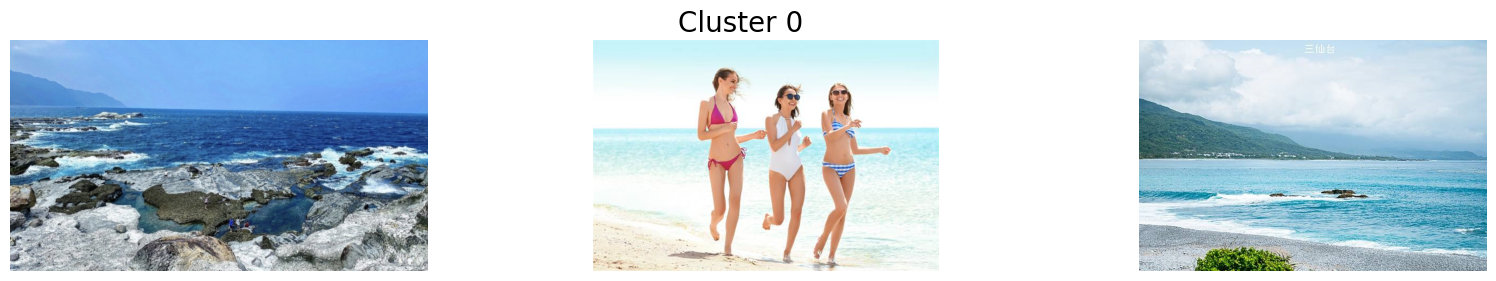

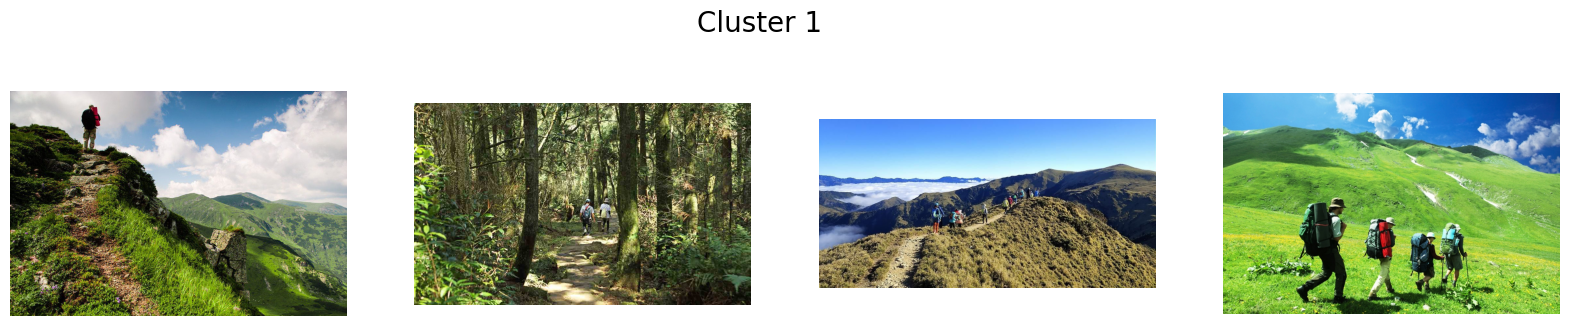

In [8]:
# Perform clustering
n_clusters = 2  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters,n_init=5)
kmeans.fit(features_array)
labels = kmeans.labels_

# Print cluster assignments
for img_path, label in zip(image_paths, labels):
    print(f'Image: {img_path} - Cluster: {label}')

plot_custer(labels,image_paths)

[2 2 2 2 1 1 1]
Image: images3/2.jpg - Cluster: 2
Image: images3/3.jpg - Cluster: 2
Image: images3/1.jpg - Cluster: 2
Image: images3/0.jpg - Cluster: 2
Image: images3/5.jpg - Cluster: 1
Image: images3/4.jpg - Cluster: 1
Image: images3/6.jpg - Cluster: 1


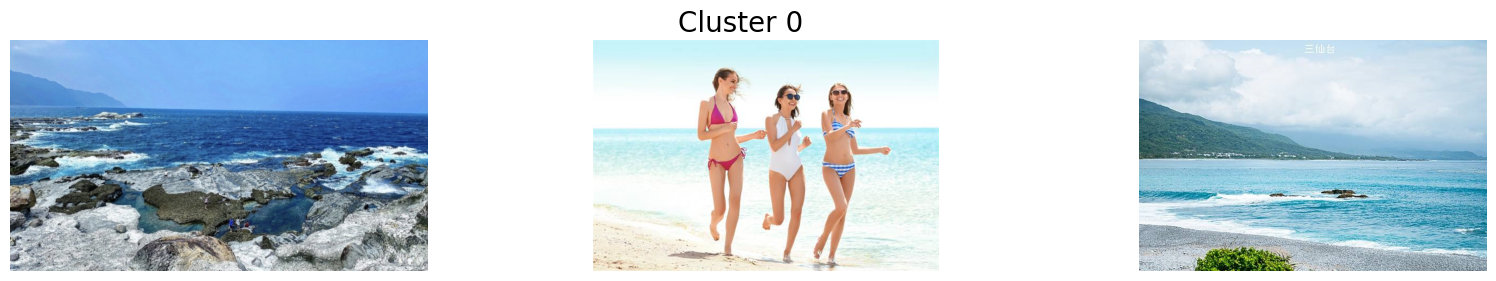

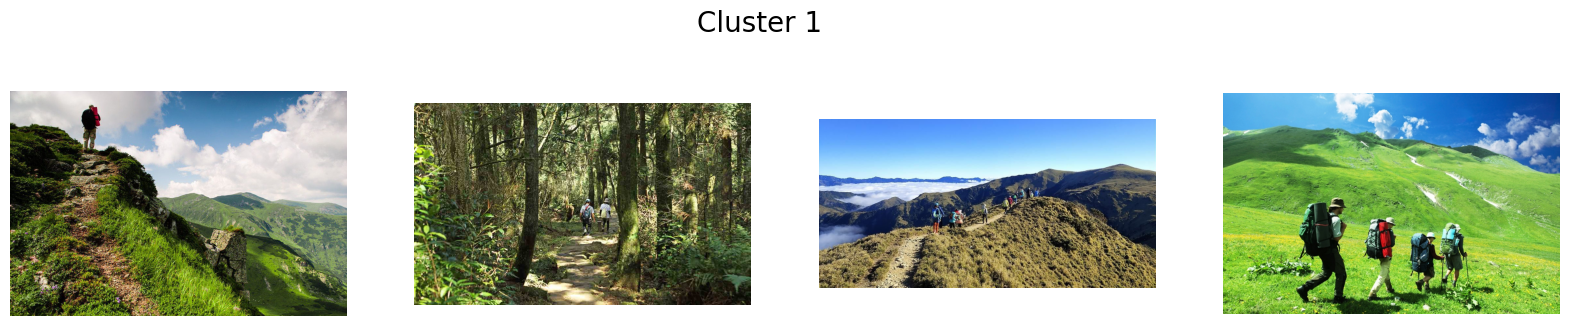

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering
linked = linkage(features_array, method='ward')
labels = fcluster(linked, t=2, criterion='maxclust')
print(labels)
# Print cluster assignments
for img_path, label in zip(image_paths, labels):
    print(f'Image: {img_path} - Cluster: {label}')


plot_custer(labels-1,image_paths)

[2 2 2 2 1 1 1]
Image: images3/2.jpg - Cluster: 2
Image: images3/3.jpg - Cluster: 2
Image: images3/1.jpg - Cluster: 2
Image: images3/0.jpg - Cluster: 2
Image: images3/5.jpg - Cluster: 1
Image: images3/4.jpg - Cluster: 1
Image: images3/6.jpg - Cluster: 1


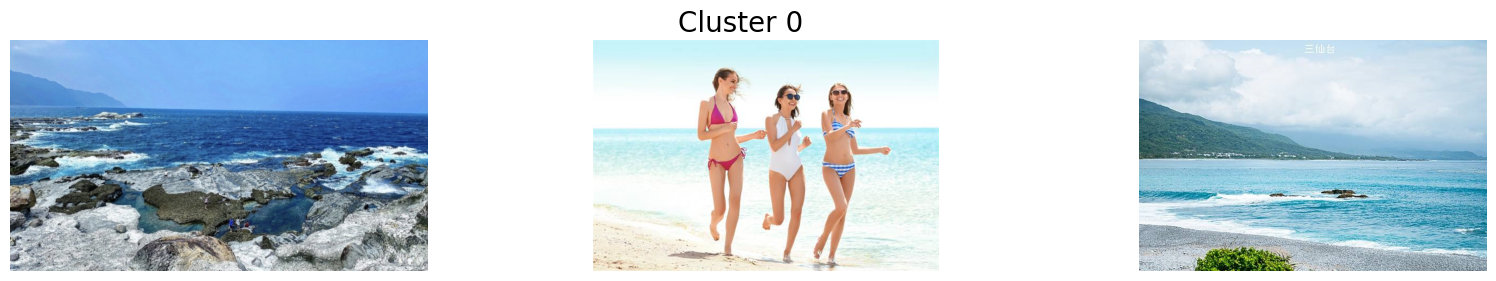

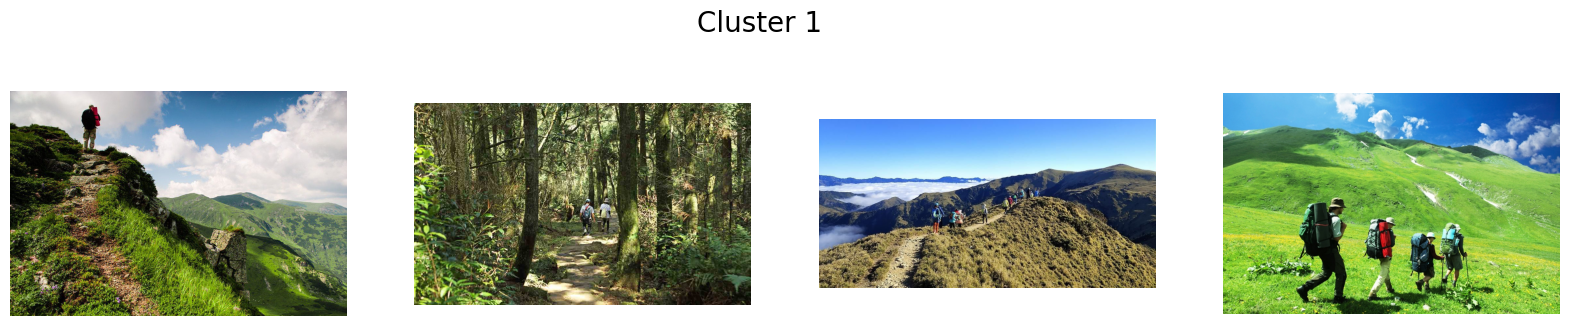

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
# Perform hierarchical clustering
# Compute cosine distance matrix
cosine_distances = pdist(features_array, metric='cosine')

# Perform hierarchical clustering using the cosine distance matrix
linked = linkage(cosine_distances, method='average')

#linked = linkage(pca_features, method='ward')
labels = fcluster(linked, t=2, criterion='maxclust')
print(labels)
# Print cluster assignments
for img_path, label in zip(image_paths, labels):
    print(f'Image: {img_path} - Cluster: {label}')

plot_custer(labels-1,image_paths)

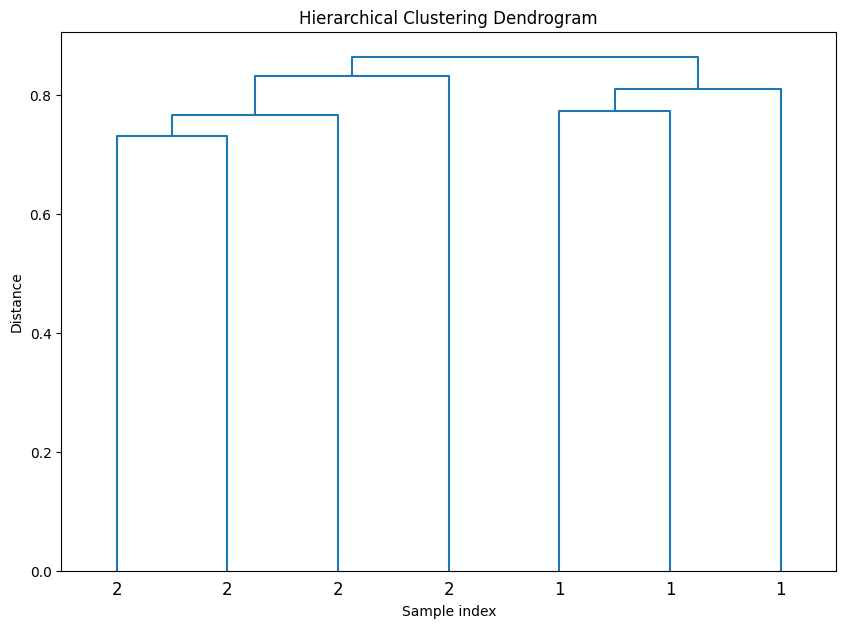

In [11]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=labels, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

## Apply PCA to reduce dimensionality

In [12]:
n_samples, n_features = features_array.shape
n_components = min(n_samples, n_features, 50)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(features_array)
print(pca_features.shape)

(7, 7)


Image: images3/2.jpg - Cluster: 0
Image: images3/3.jpg - Cluster: 0
Image: images3/1.jpg - Cluster: 0
Image: images3/0.jpg - Cluster: 0
Image: images3/5.jpg - Cluster: 1
Image: images3/4.jpg - Cluster: 1
Image: images3/6.jpg - Cluster: 1


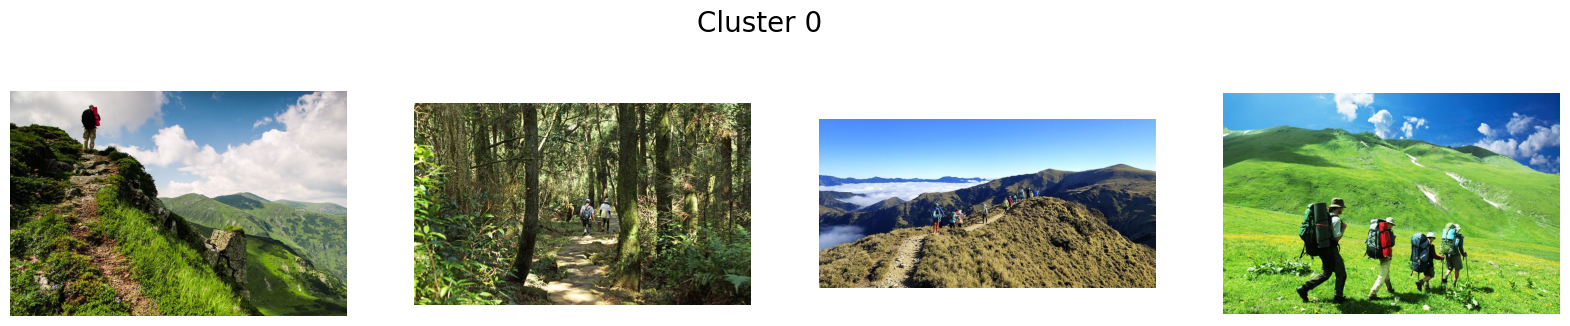

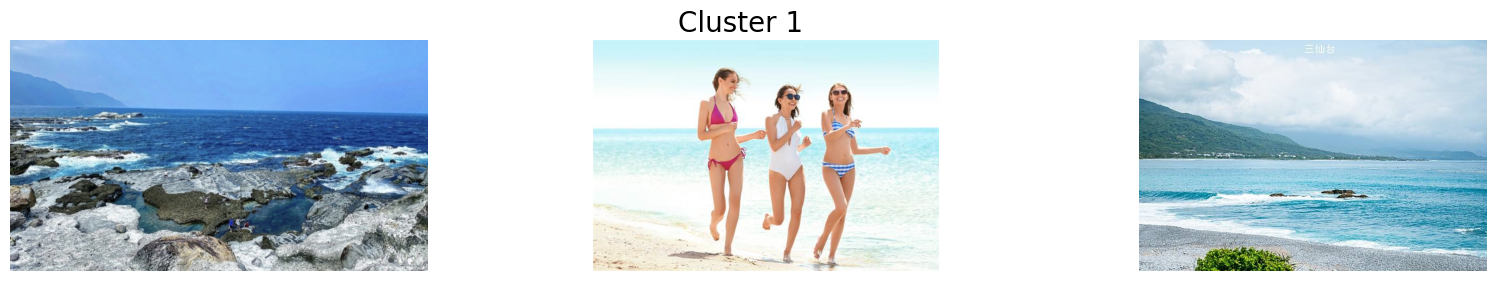

In [14]:
# Perform clustering
n_clusters = 2  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters,n_init=10)
kmeans.fit(pca_features)
labels = kmeans.labels_

# Print cluster assignments
for img_path, label in zip(image_paths, labels):
    print(f'Image: {img_path} - Cluster: {label}')

plot_custer(labels,image_paths)

[2 2 2 2 1 1 1]
Image: images3/2.jpg - Cluster: 2
Image: images3/3.jpg - Cluster: 2
Image: images3/1.jpg - Cluster: 2
Image: images3/0.jpg - Cluster: 2
Image: images3/5.jpg - Cluster: 1
Image: images3/4.jpg - Cluster: 1
Image: images3/6.jpg - Cluster: 1


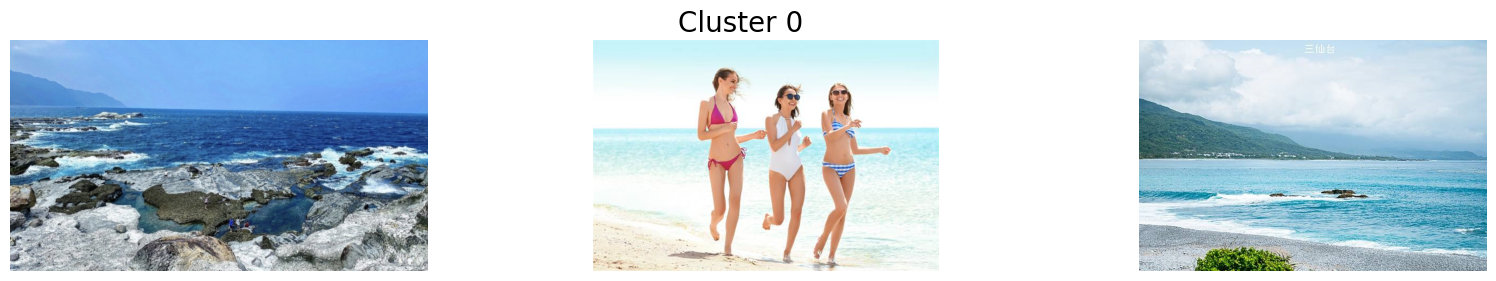

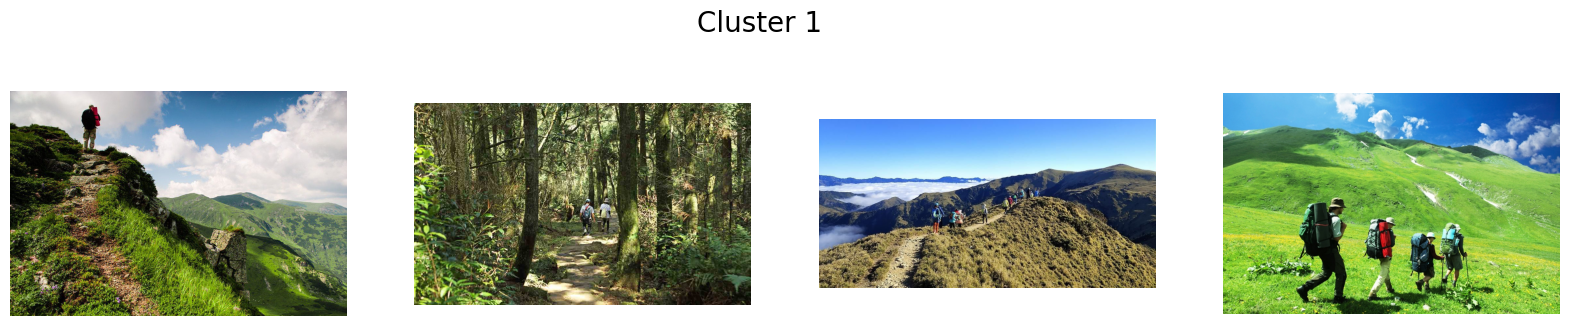

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
# Perform hierarchical clustering
# Compute cosine distance matrix
cosine_distances = pdist(pca_features, metric='cosine')

# Perform hierarchical clustering using the cosine distance matrix
linked = linkage(cosine_distances, method='average')

#linked = linkage(pca_features, method='ward')
labels = fcluster(linked, t=2, criterion='maxclust')
print(labels)
# Print cluster assignments
for img_path, label in zip(image_paths, labels):
    print(f'Image: {img_path} - Cluster: {label}')

plot_custer(labels-1,image_paths)